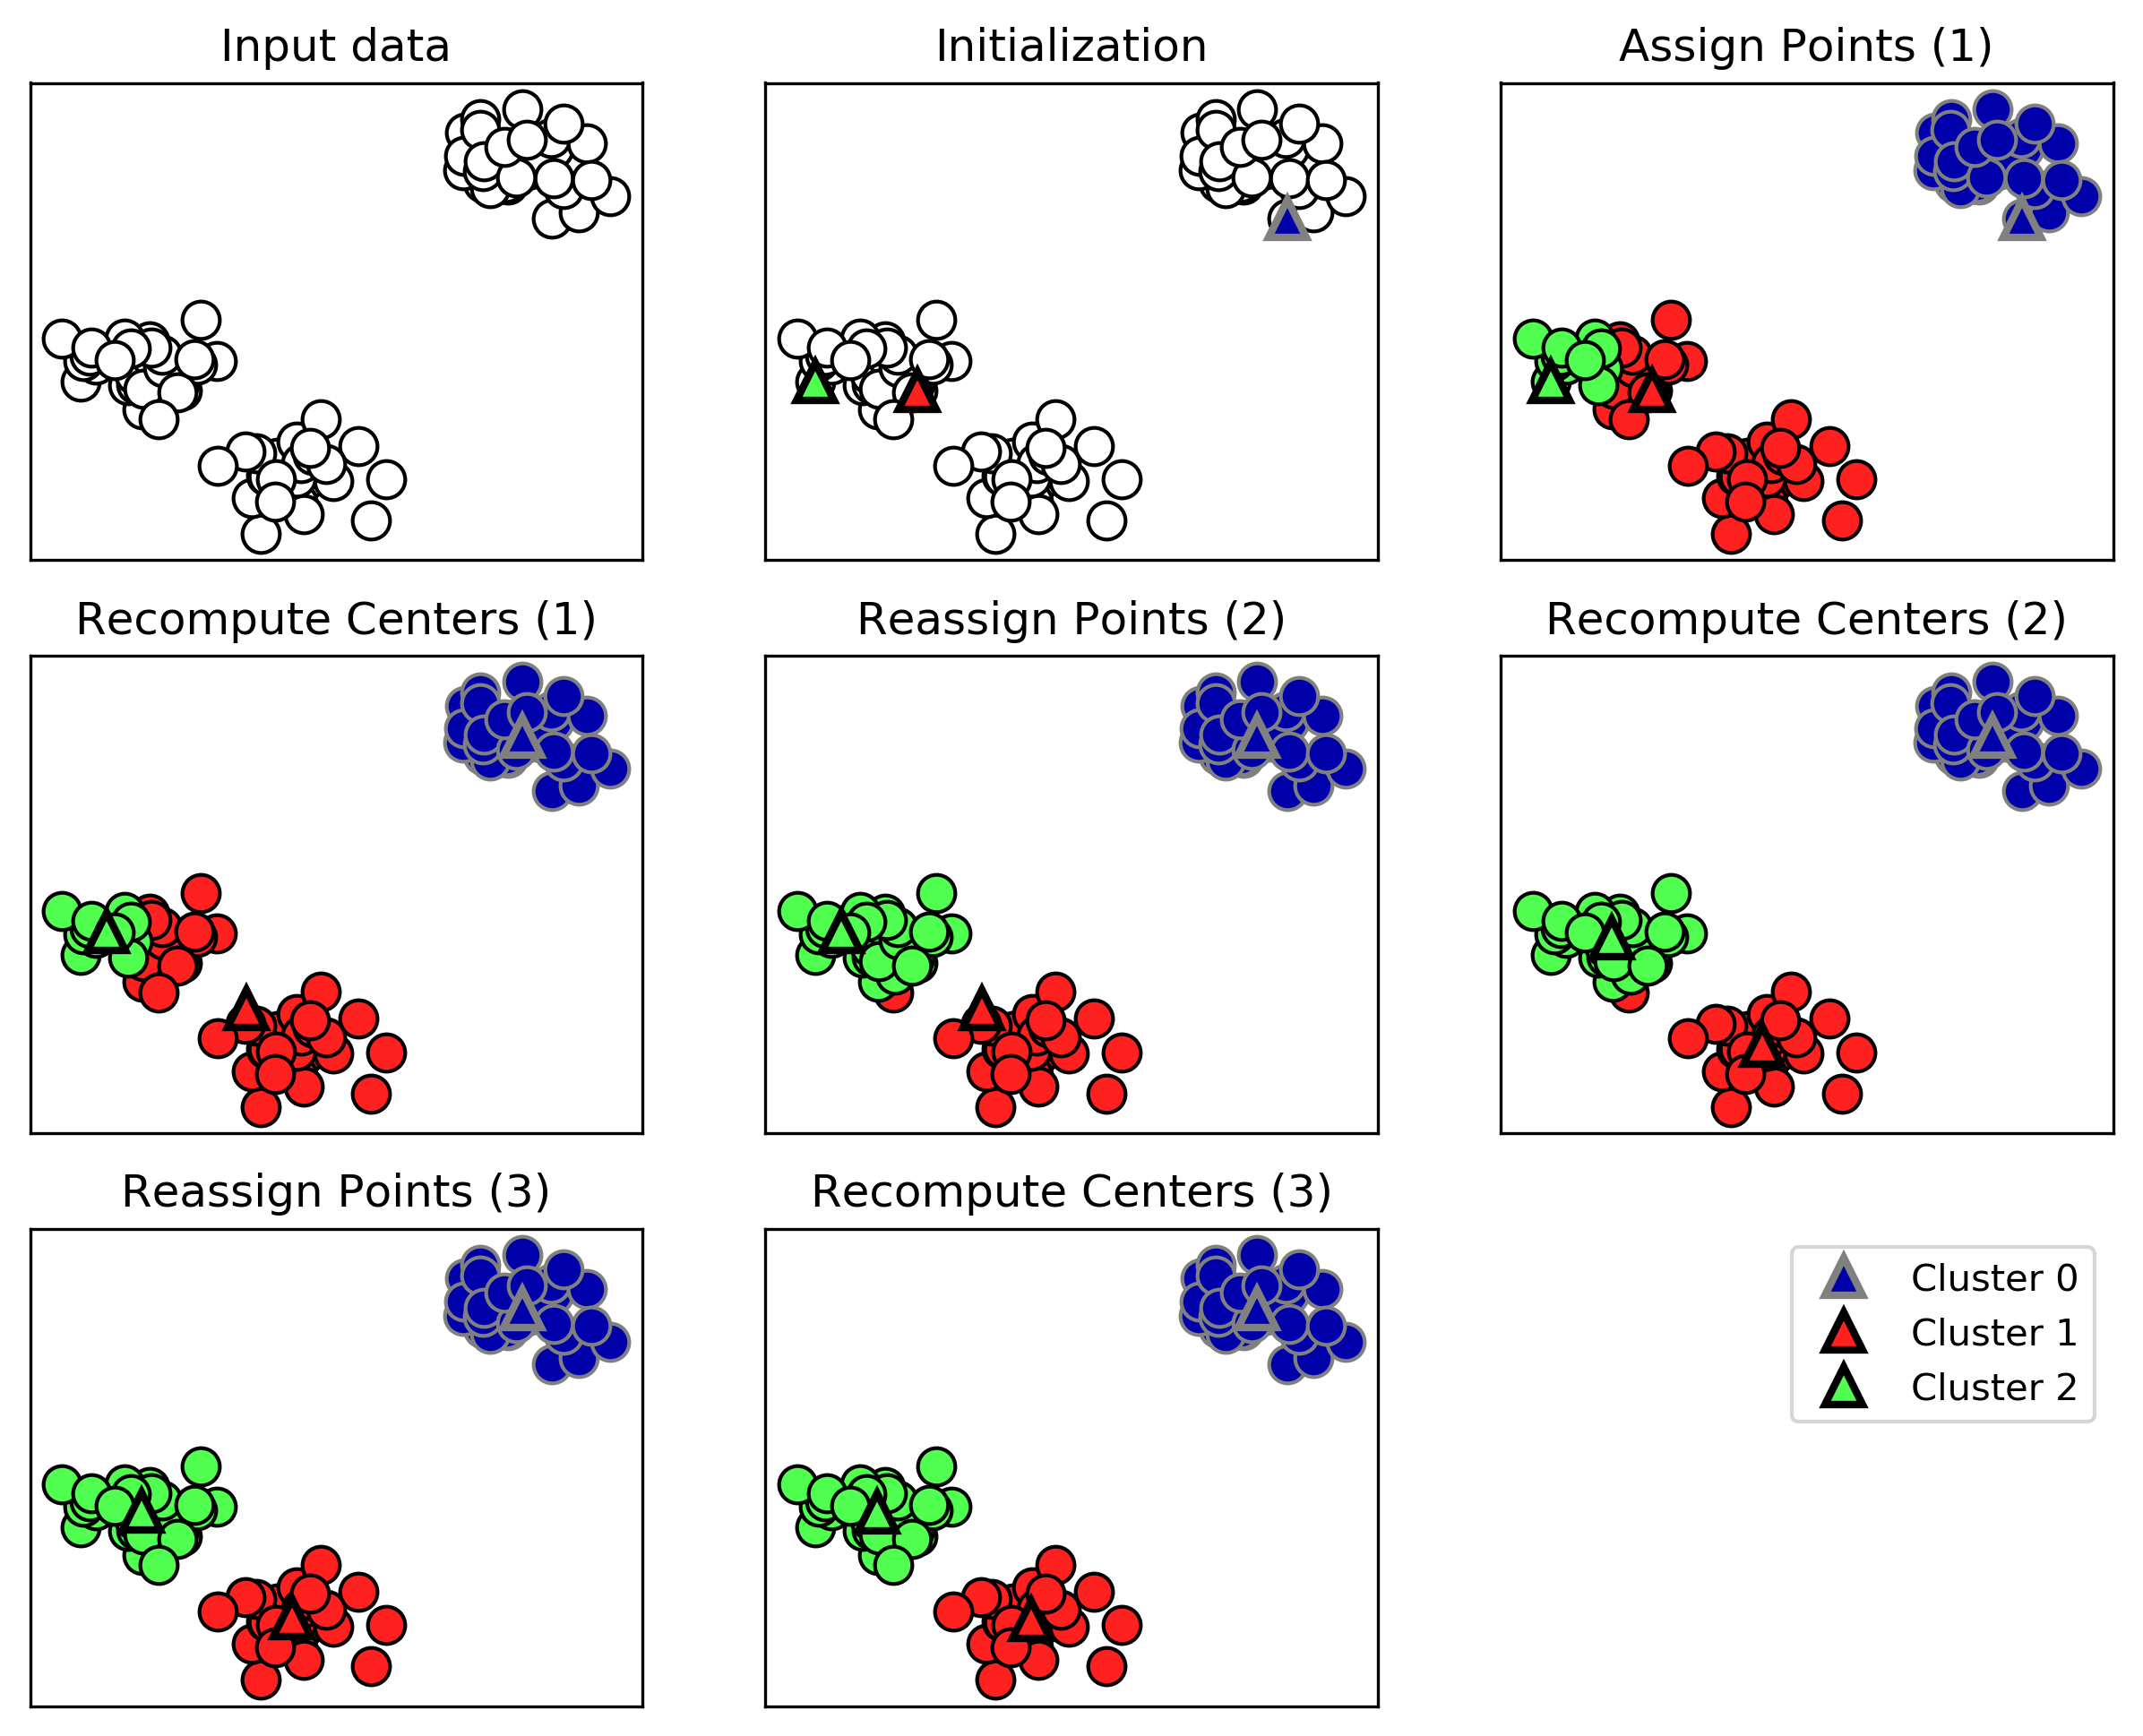

In [1]:
%matplotlib inline
import sys
sys.path.append('..')
from preamble import *
plt.rcParams['image.cmap'] = "gray"
mglearn.plots.plot_kmeans_algorithm()

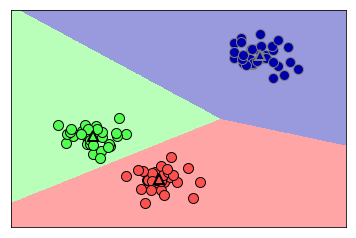

In [2]:
mglearn.plots.plot_kmeans_boundaries()

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
print(X[0], X[1], X[2])
print(y[0], y[1], y[2])

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

[-0.794  2.105] [-9.152 -4.813] [-11.442  -4.458]
0 1 1


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [5]:
print("Cluster memberships:\n{}".format(kmeans.predict(X)))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


[[ -6.582  -8.172]
 [ -1.471   4.337]
 [-10.049  -3.86 ]]


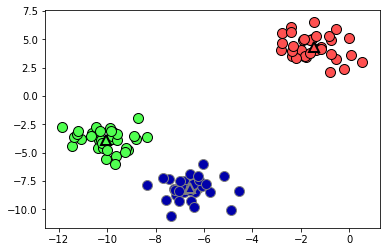

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

print(kmeans.cluster_centers_)

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=2
)

* 클래스터 수를 2로 제한하거나 5로 늘림

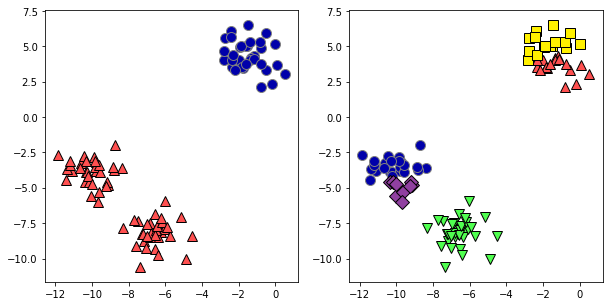

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

#### Failure cases of k-Means
* k-Means는 클러스터 중심 사이에 정확히 중간에 Decision Boundary를 긋는다.
* fit_predict
  * 훈련 데이터 셋트로 클러스터를 구성하고 각 데이터 포인트마다 구성된 클러스터의 소속 정보를 얻기 위한 함수

Text(0,0.5,'Feature 1')

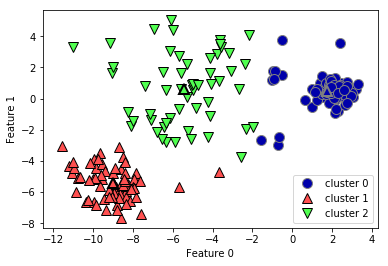

In [8]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

kmeans = KMeans(n_clusters=3, random_state=0)

y_pred = kmeans.fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=2
)

plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* k-Means에서는 클러스터에서 모든 방향이 동일하게 중요하게 간주됨

In [9]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
print(transformation)
X = np.dot(X, transformation)

[[ 0.608 -0.637]
 [-0.409  0.853]]


Text(0,0.5,'Feature 1')

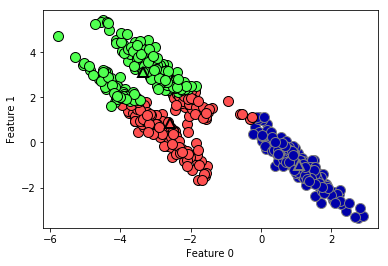

In [10]:
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=2
)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* 데이터 분포 형태가 복잡하다면 k-Means의 클러스터링 성능은 매우 나빠짐

Text(0,0.5,'Feature 1')

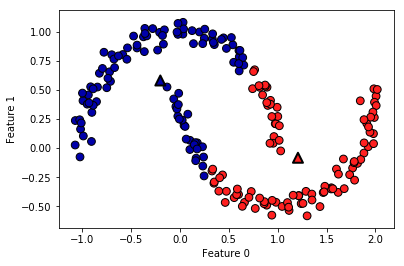

In [11]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')

plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker='^', 
    c=[mglearn.cm2(0), mglearn.cm2(1)], 
    s=100, 
    linewidth=2,
    edgecolor='k'
)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Vector Quantization (or Seeing k-Means as Decomposition)
* k-Means는 각 클러스터들의 중심이 해당 클러스터에 속한 데이터들을 대표한다고 간주할 수 있음
* 이렇게 각각의 데이터가 하나의 요소로 요약되는 상황을 Vector Quantization (벡터 양자화)라고 함
* [Note] Quantization
  * In mathematics and digital signal processing, it is the process of mapping input values from a large set (often a continuous set) to output values in a (countable) smaller set.
* [Note] Vector Quantization
  * It works by mapping a large set of points (vectors) into groups having approximately the same number of points closest to them.

In [12]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

    
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

In [13]:
from sklearn.model_selection import train_test_split

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 값을 0~1 사이의 값으로 변환 --> 그레이 스케일로 변환
X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (1547, 5655)
y_train.shape: (1547,)
X_test.shape: (516, 5655)
y_test.shape: (516,)


In [17]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
print("pca.transform(X_test).shape: {}".format(pca.transform(X_test).shape))
print("X_reconstructed_pca.shape: {}".format(X_reconstructed_pca.shape))

print()

#100개의 중심들 중(kmeans.cluster_centers_)에서 
#kmeans.predict(X_test)에 의한 총 494개의 클러스터 Index에 해당하는 것들로만
#494번 k-Means 중심들을 추출하여 X_reconstructed_kmeans에 저장  
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
print("kmeans.predict(X_test).shape: {}".format(kmeans.predict(X_test).shape))
print("kmeans.cluster_centers_.shape: {}".format(kmeans.cluster_centers_.shape))
print("X_reconstructed_kmeans.shape: {}".format(X_reconstructed_kmeans.shape))

print()

X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
print("nmf.transform(X_test).shape: {}".format(nmf.transform(X_test).shape))
print("nmf.components_.shape: {}".format(nmf.components_.shape))
print("X_reconstructed_nmf.shape: {}".format(X_reconstructed_nmf.shape))

pca.transform(X_test).shape: (516, 100)
X_reconstructed_pca.shape: (516, 5655)

kmeans.predict(X_test).shape: (516,)
kmeans.cluster_centers_.shape: (100, 5655)
X_reconstructed_kmeans.shape: (516, 5655)

nmf.transform(X_test).shape: (516, 100)
nmf.components_.shape: (100, 5655)
X_reconstructed_nmf.shape: (516, 5655)


kmeans.cluster_centers_.shape: (100, 5655)
pca.components_.shape: (100, 5655)
nmf.components_.shape: (100, 5655)


Text(0,0.5,'nmf')

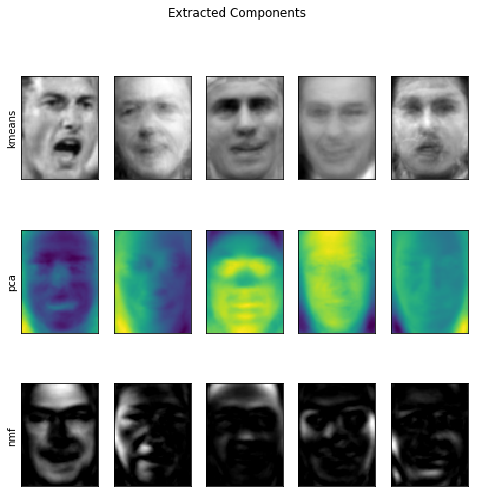

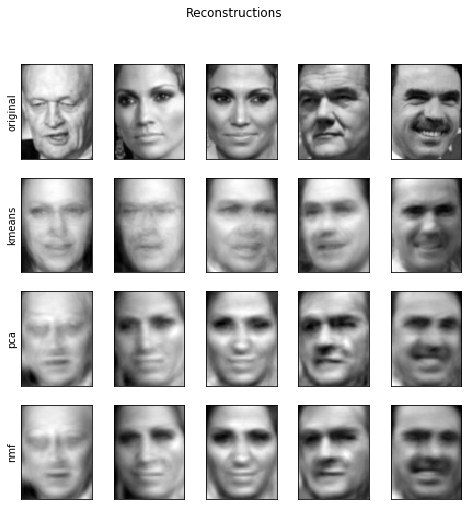

In [19]:
print("kmeans.cluster_centers_.shape: {}".format(kmeans.cluster_centers_.shape))
print("pca.components_.shape: {}".format(pca.components_.shape))
print("nmf.components_.shape: {}".format(nmf.components_.shape))

image_shape = people.images[0].shape

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, 
        kmeans.cluster_centers_, 
        pca.components_, 
        nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T,
        X_test,
        X_reconstructed_kmeans,
        X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

* k-Means로 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있음

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


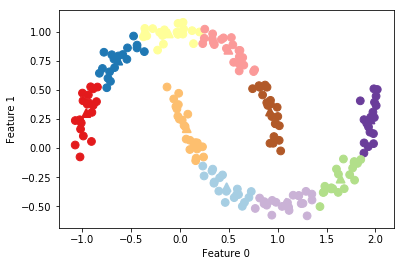

In [20]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=60,
    marker='^', 
    c=range(kmeans.n_clusters), 
    linewidth=2, 
    cmap='Paired'
)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

* kmeans.transform(X)
  * 각 데이터마다 대응되는 중심까지의 거리를 특성으로 사용하는 데이터 생성

In [21]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.922 1.466 1.14  ... 1.166 1.039 0.233]
 [1.142 2.517 0.12  ... 0.707 2.204 0.983]
 [0.788 0.774 1.749 ... 1.971 0.716 0.944]
 ...
 [0.446 1.106 1.49  ... 1.791 1.032 0.812]
 [1.39  0.798 1.981 ... 1.978 0.239 1.058]
 [1.149 2.454 0.045 ... 0.572 2.113 0.882]]


* 대규모 데이터에 대한 k-Means 적용방법
  * MiniBatchKMeans 사용
    * batch_size의 기본 값: 100
    * 전체 데이터에서 100개를 임의로 선택하여 클러스터 중심 계산
* k-Means의 단점
  * 난수 초기화에 따라 k-Means 클러스터링 결과 달라짐
    * scikit-learn의 대처 방법
      * 10개의 서로 다른 난수 초기값을 적용하여 k-Means를 수행하고 각 결과에서 산출되는 클러스터 분산의 합이 작은 것을 최종 결과로 택함
  * 클러스의 모양이 제한적
    * 클러스터 경계가 각 클러스터 중심에서 동일한 거리에 존재
  * 사용자가 클러스터의 개수를 직접 지정

#### 3.5.2 Agglomerative (병합) Clustering
* 알고리즘 초기에 각 데이터 포인트 하나당 하나의 클러스터로 지정
* 이후 종료 조건이 만족할 때까지 가장 유사한 두 개의 클러스터를 병합
* scikit-learn의 종료조건
  * 지정된 개수의 클러스터 개수로 줄어들때 까지 수행
  * AgglomerativeClustering(n_clusters=3): 3개의 클러스터가 남게 됨
* linkage 옵션: 유사한 클러스터를 측정하는 방법 지정
  * ward
    * 병합될 클러스터내의 분산을 가장 적게 증가시키는 두 클러스터를 병합
  * average
    * 병합될 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 병합 (it uses the average of the distances of each observation of the two sets)
  * complete
    * 병합될 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 병합 (it uses the maximum distances between all observations of the two sets)
* 참고: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

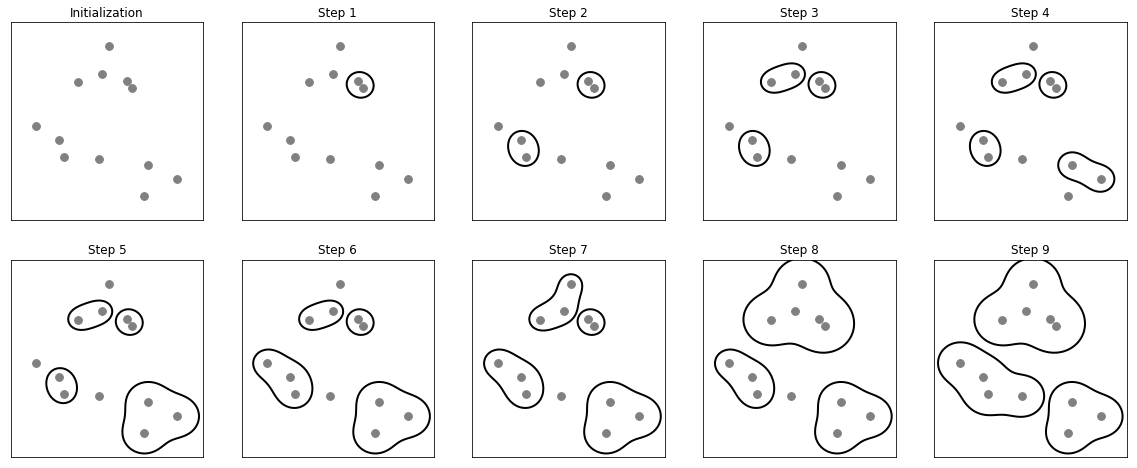

In [22]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0,0.5,'Feature 1')

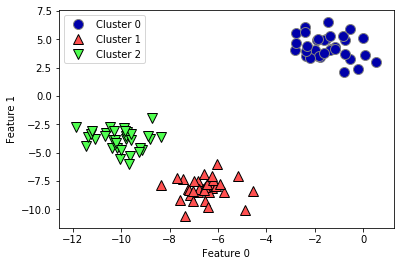

In [23]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Hierarchical Clustering and Dendrograms
* 병합 클러스터링은 자연스럽게 계층적 클러스터링 기법이 된다.
* 병합 클러스터링 알고리즘 수행 중간 단계에서는 각기 다른 개수의 클러스터를 생성함.

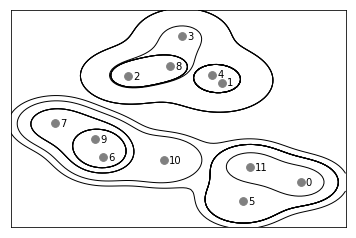

In [24]:
mglearn.plots.plot_agglomerative()

* Dendrogram
  * 계층 클러스터링 시각화 그래프
  * scikit-learn에서는 이 그래프를 그리는 기능 제공하지 않음
  * 대신 SciPy 패키지 사용 가능
    * linkage_array = ward(X)
      * 계층 군집의 유사도 및 클러스터링 단계를 포함하는 연결 배열 반환

In [25]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
print(linkage_array)

[[ 1.     4.     0.332  2.   ]
 [ 6.     9.     0.646  2.   ]
 [ 2.     8.     0.927  2.   ]
 [ 0.    11.     1.18   2.   ]
 [ 5.    15.     1.303  3.   ]
 [ 7.    13.     1.444  3.   ]
 [ 3.    14.     1.6    3.   ]
 [12.    18.     2.078  5.   ]
 [10.    17.     2.16   4.   ]
 [16.    20.     6.55   7.   ]
 [19.    21.     7.924 12.   ]]


Text(0,0.5,'Cluster distance')

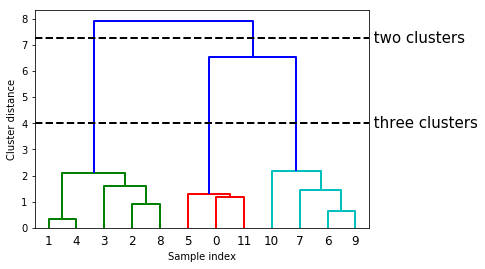

In [26]:
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

* 위 Dendrogram에서 가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 나타냄.

#### 3.5.3 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
* 장점
  * 클러스터 개수 지정 필요 없음
  * 데이터 포인트들의 복잡한 형상도 분석하여 클러스터링 가능
  * 어떠한 클러스터에도 속하지 않는 포인트도 구분 가능
  * 비교적 큰 데이터셋에도 적용가능

* 주요 개념

  * Dense Region (밀집 지역)
    * 특성 공간에서 유사한 공간에 데이터가 많이 밀집되어 있는 지역
    * DBSCAN의 기본 아이디어: 클러스터 구성 기반으로서 데이터의 밀집 지역 활용
  * Core Sample (or Core Points, 핵심 샘플, 핵심 포인트)
    * 주요 매개변수: eps (기본값:0.5), min_samples (기본값:5)
    * 임의의 데이터 포인트 p에서 eps 거리 안에 min_samples 개수 만큼의 데이터 포인트가 들어 있으면 해당 p를 핵심 포인트포 분류하고 이들 데이터 포인트들을 동일한 클러스터로 병합함

* 주요 데이터 포인트 정리 (from wikipedia)

  * A point p is a core point if at least min_samples points are within distance eps (eps is the maximum radius of the neighborhood from p) of it (including p).
  * Those points are said to be directly reachable from p.
  * A point q is directly reachable from p if point q is within distance eps from point p and p must be a core point.
  * A point q is reachable from p if there is a path p1, ..., pn with p1=p and pn=q, where each pi+1 is directly reachable from pi (all the points on the path must be core points, with the possible exception of q).
  * All points not reachable from any other point are outliers.

* 임의의 포인트는 다음과 같이 3개의 종류로 나뉨

  * Core Points
  * Boundary Points
    * 경계 포인트는 두 개 이상의 클러스터 핵심 포인트의 이웃일 수 있음.
    * 이러한 경우, 방문 순서에 의해 클러스터 소속이 결정됨.
    * 이러한 경계 포인트의 개수는 일반적으로 그렇게 많지 않음.
  * Noise (or Outlier) Points
![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png)
  * Eample (see the above figure)
    * In the above diagram, $min\_samples$ = 4.
    * Point $A$ and the other red points are core points, because the area surrounding these points in an $eps$ radius contain at least 4 points (including the point itself).
    * Because they are all reachable from one another, they form a single cluster.
    * Points $B$ and $C$ are not core points, but are reachable from $A$ (via other core points) and thus belong to the cluster as well (Point $B$ and $C$ are boundary points).
    * Point $N$ is a noise point that is neither a core point nor directly-reachable.

In [27]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


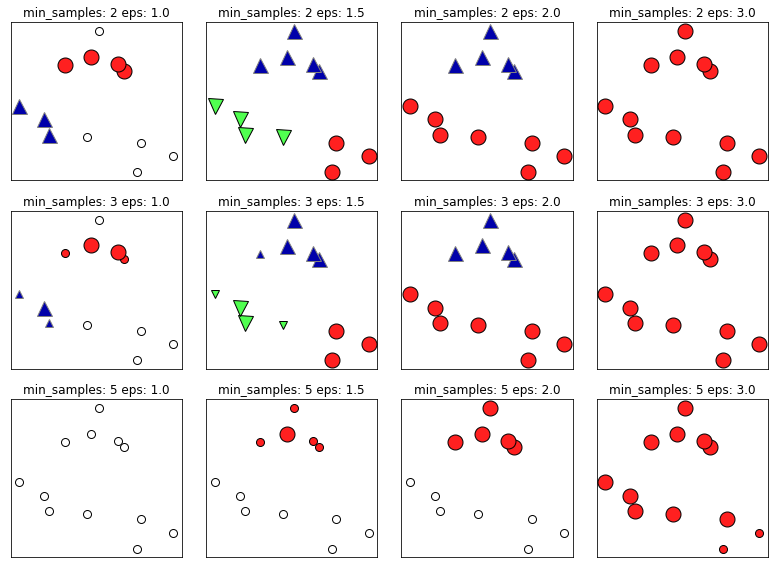

In [28]:
mglearn.plots.plot_dbscan()

Text(0,0.5,'Feature 1')

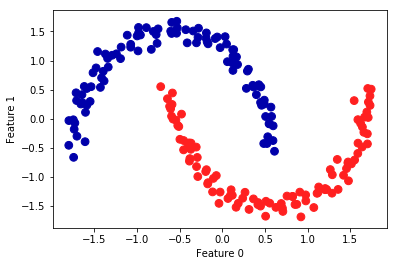

In [30]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

from sklearn.preprocessing import StandardScaler

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 3.5.4 Comparing and evaluating clustering algorithms
#### Evaluating clustering with ground truth
* 훈련 데이터에 대한 Target을 알고 있을 때 Clustering Algorithm 평가방법
  * ARI (Adjusted Rand Index)
    * adjusted_rand_score(y, predicted_clusters)
    * 무작위 클러스터링: 0
    * 1에 가까운 값일수록 타깃과 더 유사한 클러스터링 결과
  * NMI (Normalized Mutual Information)
    * normalized_mutual_infro_score(y, predicted_clusters)
    * 무작위 클러스터링: 0
    * 1에 가까운 값일수록 타깃과 더 유사한 클러스터링 결과

In [31]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

* ARI (Adjusted Rand Index)

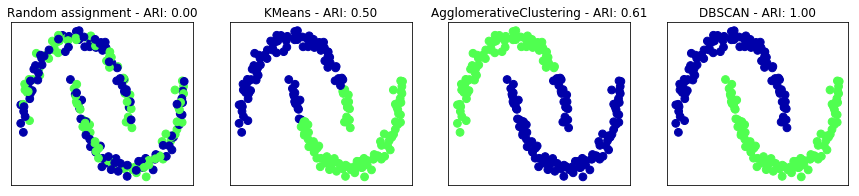

In [32]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

* NMI (Normalized Mutual Information)

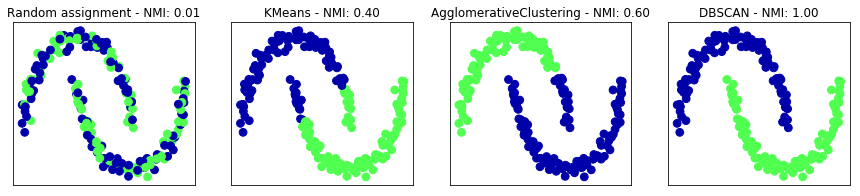

In [33]:
from sklearn.metrics.cluster import normalized_mutual_info_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - NMI: {:.2f}".format(normalized_mutual_info_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - NMI: {:.2f}".format(algorithm.__class__.__name__, normalized_mutual_info_score(y, clusters)))

* accuracy_score 는 사용하면 안됨

In [34]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

# normalized mutual information score is 1, as the clustering is exactly the same:
print("NMI: {:.2f}".format(normalized_mutual_info_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00
NMI: 1.00


#### Evaluating clustering without ground truth
* 수집한 데이터 자체에 Target 값이 없을 때 클러스터링 알고리즘 성능 평가하기
  * Sihouette Coefficient (실루엣 계수)
    * 그다지 추천하지 않음
    * 클러스터의 밀집정도를 계산함 - 밀집정도가 높을 수록 1에 가까운 값을 반환함.
  * Robustness-based Evaluation (견고성 기반 평가)
    * 데이터에 잡음 포인트를 추가하거나 여러가지 매개변수 설정으로 알고리즘을 실행하여도 클러스터 구성이 변하지 않을 때 해당 클러스터 구성 결과에 높은 신뢰도가 있다고 볼 수 있음
    * scikit-learn에서는 지원하지 않음
  * 사람이 직접 확인하는 방법

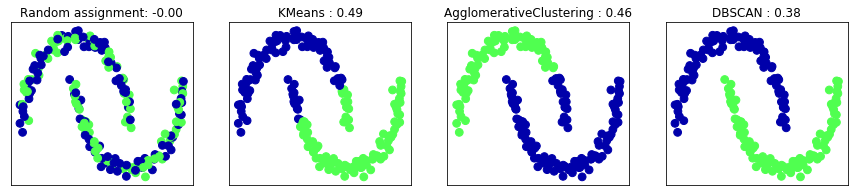

In [35]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

#### Comparing algorithms on the faces dataset
* LFW 데이터셋에 대한 k-means, DBSCAN, Agglomerative Clustering 적용 결과 비교
* LFW 데이터셋에 대하여 PCA 적용하여 주성분 100개의 얼굴데이터 활용

In [36]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

#### Analyzing the faces dataset with DBSCAN
* eps=0.5, min_samples=5

In [37]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


* eps=0.5, min_samples=3

In [38]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


* eps=15, min_samples=3

In [39]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


* 잡음 포인트와 클러스터로 분류된 포인트의 개수를 카운트
* np.bincount 활용
  * np.bincount는 음수를 허용하지 않기 때문에 1을 더하여 활용
  * 잡음 포인트: 31개
  * 클러스터로 분류된 포인트: 1945개

In [40]:
# count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# the first number in the result corresponds to noise points
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  32 2031]


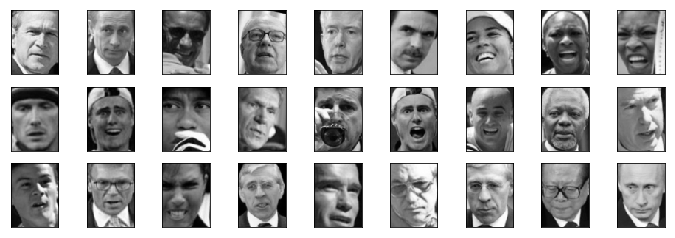

In [41]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

* 잡음으로 분류된 이유 추정
  * 손이 얼굴 앞을 가리고 있는 경우
  * 얼굴 각도가 이상한 경우
  * 얼굴을 너무 가까이서 혹은 너무 멀리서 자른 경우
* Outlier Detection (이상치 검출)

* eps 값을 줄여서 더 많은 클러스터 구성하기

In [42]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 1
Cluster sizes: [2063]

eps=3
Number of clusters: 1
Cluster sizes: [2063]

eps=5
Number of clusters: 1
Cluster sizes: [2063]

eps=7
Number of clusters: 14
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Number of clusters: 4
Cluster sizes: [1307  750    3    3]

eps=11
Number of clusters: 2
Cluster sizes: [ 413 1650]

eps=13
Number of clusters: 2
Cluster sizes: [ 120 1943]


* DBSCAN의 단점
  * 클러스터의 개수 컨트롤을 직접적으로 할 수 없음
  * 사이즈가 큰 하나의 클러스터가 항상 생성되고 있음

Cluster: 0, n_images: 3
Cluster: 1, n_images: 14
Cluster: 2, n_images: 7
Cluster: 3, n_images: 4
Cluster: 4, n_images: 3
Cluster: 5, n_images: 3
Cluster: 6, n_images: 4
Cluster: 7, n_images: 4
Cluster: 8, n_images: 3
Cluster: 9, n_images: 3
Cluster: 10, n_images: 5
Cluster: 11, n_images: 3
Cluster: 12, n_images: 3


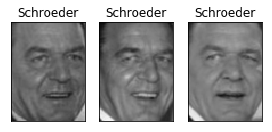

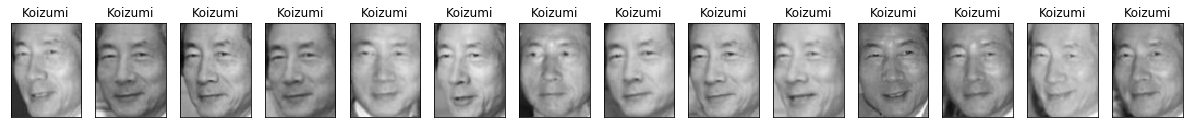

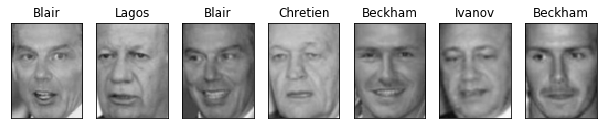

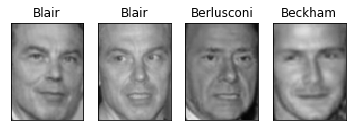

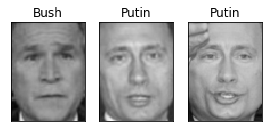

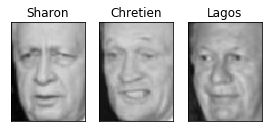

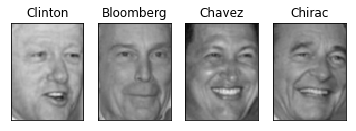

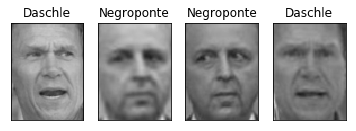

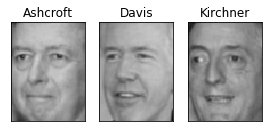

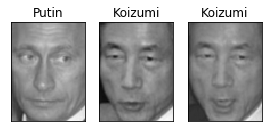

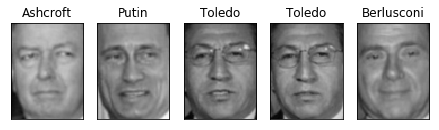

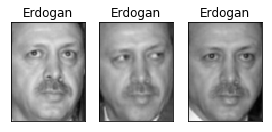

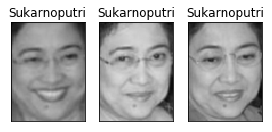

In [43]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    print("Cluster: {0}, n_images: {1}".format(cluster, n_images))
    
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

#### Analyzing the faces dataset with k-Means

In [44]:
# extract clusters with k-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


* k-means 클러스터 center 10개를 원본 이미지로 inverse_transform 하여 시각화하기

km.cluster_centers_.shape: (10, 100)
pca.inverse_transform(center).shape:  (5655,)


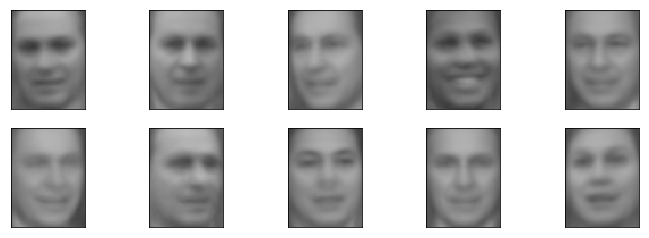

In [46]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

print("km.cluster_centers_.shape:", km.cluster_centers_.shape)
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

print("pca.inverse_transform(center).shape: ", pca.inverse_transform(center).shape)

* 위 center 이미지는 각 클러스터에 속한 얼굴 이미지의 평균이라고 간주해야 함
* 특히 PCA를 사용하여 감소된 특성과 함께 k-means를 적용했기 때문에 각 이미지가 더욱 부드러워졌음
* 각 center 이미지는 각기 다른 얼굴 각도와 다른 표정을 지니고 있다고 볼 수 있음

* 각 클러스터 10개에 대하여 가장 대표적인 이미지 5개와 가장 동떨어진 이미지 5개 시각화하기

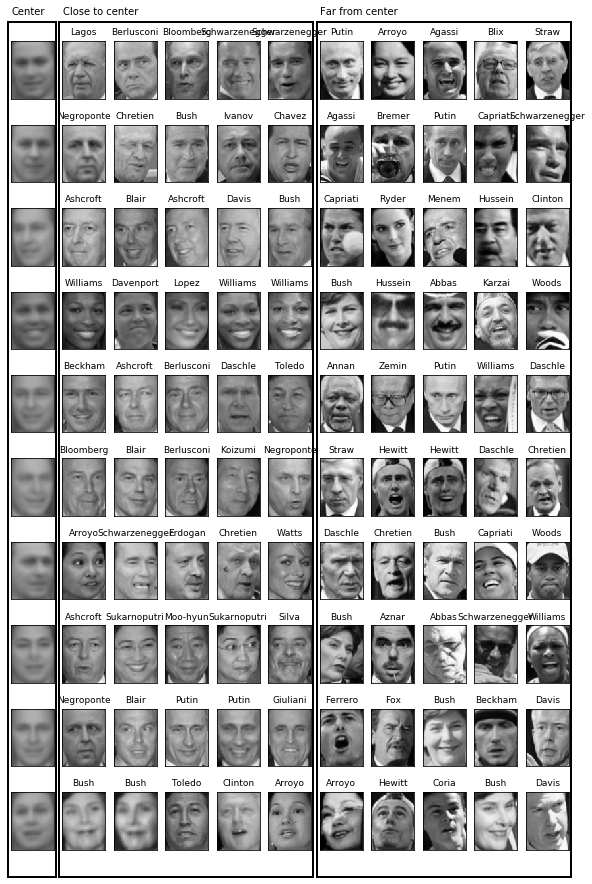

In [47]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

#### Analyzing the faces dataset with agglomerative clustering

In [48]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

cluster sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


* k-means 클러스터링 결과와 AgglomerativeClustering 클러스터링 결과를 ARI 도구를 활용하여 비교 평가하기
  * 결과값: 0.13 - 공통 부분이 거의 없다고 볼 수 있음

In [49]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


* Dendrogram 그리기
  * 트리 깊이 제한
    * p=7, truncate_mode='level'
      * 최대 level을 7로 제한

Text(0,0.5,'Cluster distance')

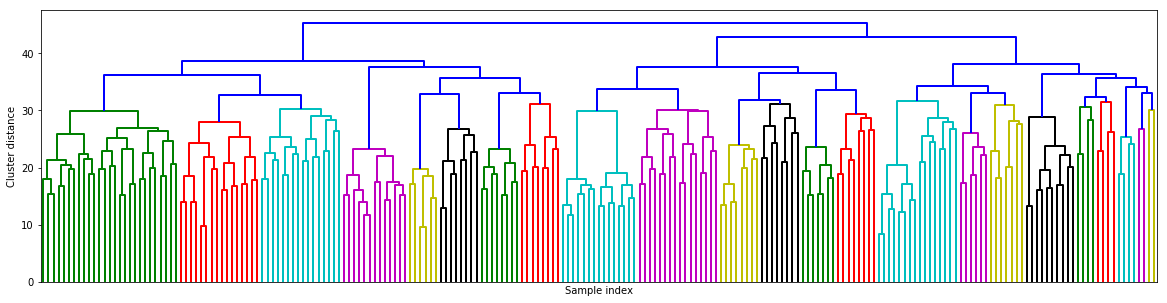

In [50]:
linkage_array = ward(X_pca)
# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

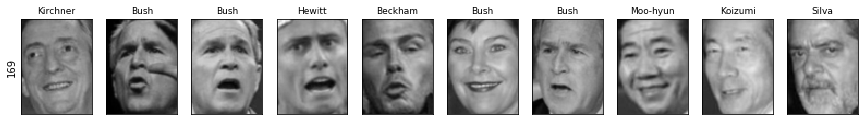

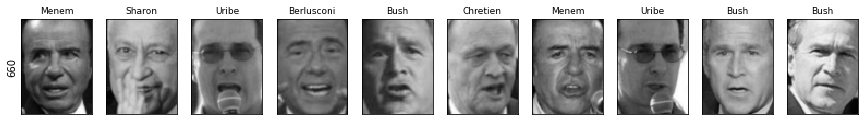

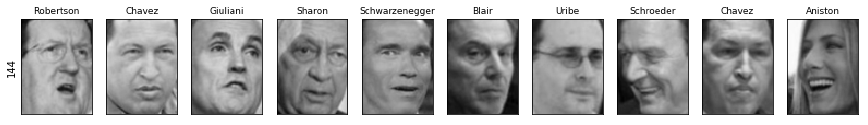

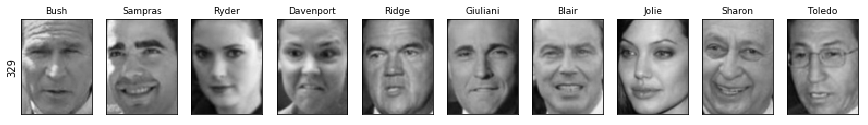

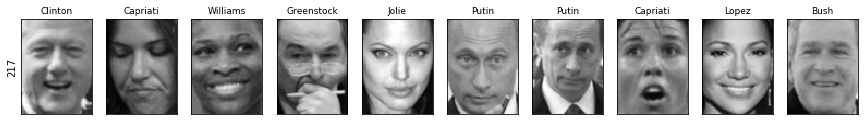

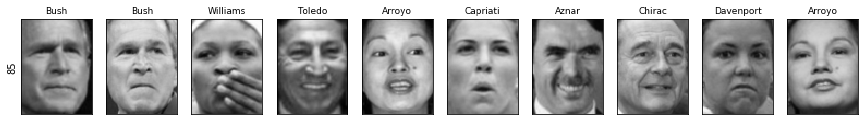

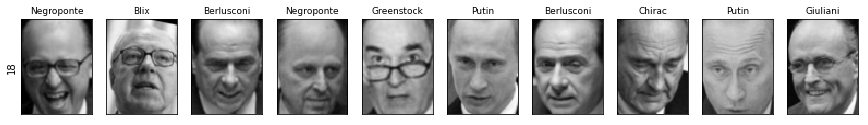

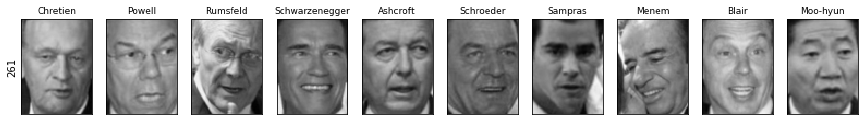

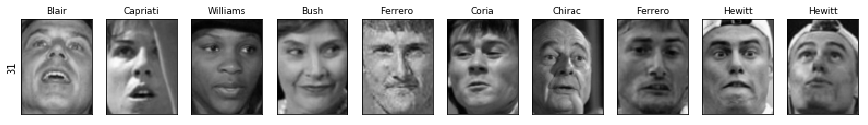

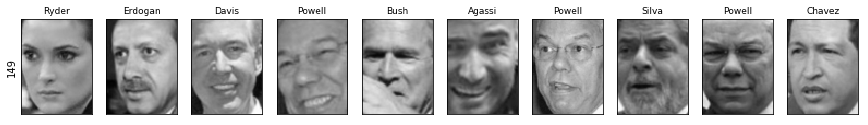

In [51]:
n_clusters = 10

for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

cluster sizes agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


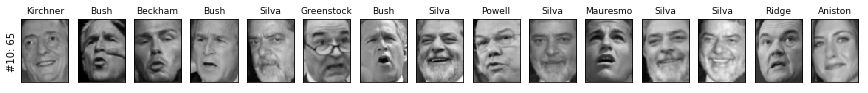

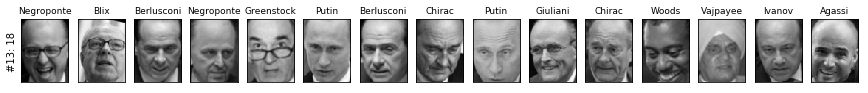

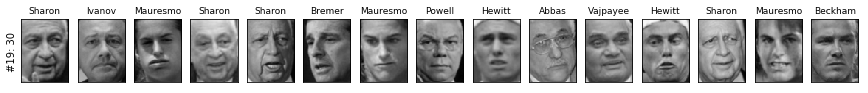

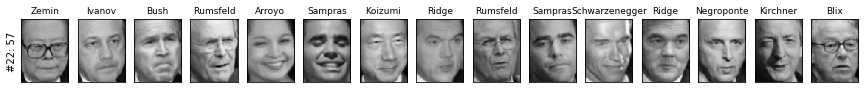

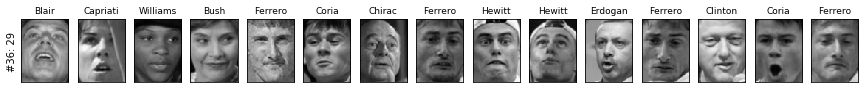

In [52]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))

    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

#### Summary of Clustering Methods
* k-means
  * 장점
    * 클러스터의 Center를 명확히 짚어낼 수 있음
* agglomerative clustering
  * 장점
    * 전체 데이터의 분할 계층도인 Dendrogram 시각화 가능
* DBSCAN
  * 장점
    * 클러스터에 속하지 않은 잡음 포인트를 인식할 수 있음
    * 클러스터 개수가 자동으로 결정됨
    * 복잡한 모양의 클러스터 형태 구분 가능

### Summary and Outlook
* Estimator (추정기)
  * scikit-learn에서 학 학습 모델 및 알고리즘을 포함하고 있는 클래스

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

* Estimator 모델 객체 구성시 지정하는 매개변수
  * 규제
  * 복잡도 제어
  * 클러스터 개수
* Estimator.fit
  * 모델 구성
  * 첫번째 매개변수로 훈련 데이터 X 필요
  * 지도 학습일 때에는 두 번째 매개변수로 타깃 데이터 y 지정 필요
* Estimator.predict
  * 새로운 타깃 예측 데이터 y_pred 생성
* Estimator.transform
  * 입력 데이터 X의 새로운 표현 형태 생성
  ![](https://nbviewer.jupyter.org/github/link-kut/introduction_to_ml_with_python/blob/master/images/api_table.png)